# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [2]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,chris,dave,deon,fortune,gabriel,iliza,jim,joe,john,louis,mike,moses,patton,ricky,tom,trevor
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
aaras,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [3]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('tell', 13),
  ('yeah', 13),
  ('dude', 12),
  ('really', 12),
  ('theyre', 12),
  ('work', 12),
  ('white', 11)],
 'anthony': [('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('say', 26),
  ('just', 26),
  ('day', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('right', 18),
  ('grandma', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('yeah', 16),
  ('good', 16),
  ('school', 16),
  ('did', 16),
  ('jokes', 16),
  ('ive', 15),
  ('okay', 15),
  ('baby', 15),
  ('gonna', 15),
  ('sha

In [4]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, know, just, dont, shit, thats, youre, gonna, lot, wanna, gotta, husband, got, right
---
anthony
like, know, dont, joke, got, said, thats, anthony, say, just, day, guys, people, youre
---
bill
like, just, right, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, fuck
---
chris
got, thats, shit, dont, man, right, fuck, like, aint, know, just, women, gonna, fucking
---
dave
like, know, said, just, shit, people, didnt, ahah, dont, time, fuck, thats, fucking, black
---
deon
shit, like, know, dont, motherfucker, ngga, aint, bitch, fuck, got, yall, just, gotta, yeah
---
fortune
like, just, got, said, dont, know, good, did, jax, right, thats, look, want, think
---
gabriel
like, know, said, just, dont, youre, thats, right, going, got, okay, yeah, hes, gonna
---
iliza
like, dont, just, know, okay, youre, want, women, thats, girl, right, got, shes, look
---
jim
like, dont, right, fucking, went, know, just, youre, people, thats, day, going, think, fuck
---
joe
like, people,

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'lot',
 'wanna',
 'gotta',
 'husband',
 'got',
 'right',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'tell',
 'yeah',
 'dude',
 'really',
 'theyre',
 'work',
 'white',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'say',
 'just',
 'day',
 'guys',
 'people',
 'youre',
 'tell',
 'right',
 'grandma',
 'time',
 'think',
 'thing',
 'yeah',
 'good',
 'school',
 'did',
 'jokes',
 'ive',
 'okay',
 'baby',
 'gonna',
 'shark',
 'like',
 'just',
 'right',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'want',
 'think',
 'people',
 'hes',
 'did',
 'guy',
 'didnt',
 'make',
 'come',
 'going',
 'thing',
 'theyre',
 'theres',
 'let',
 'doing',
 'little',
 'got',
 'thats',
 'shit',
 'dont',
 'man',
 'right',
 'fuck',
 'like',
 'aint',
 'know',
 'just',
 'women',
 'gonna',
 'fucking',
 'people',
 'w

In [6]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 19),
 ('know', 19),
 ('just', 19),
 ('dont', 19),
 ('thats', 19),
 ('right', 19),
 ('got', 18),
 ('youre', 16),
 ('gonna', 16),
 ('people', 16),
 ('time', 13),
 ('yeah', 13),
 ('think', 13),
 ('hes', 11),
 ('going', 11),
 ('say', 10),
 ('want', 10),
 ('shit', 9),
 ('cause', 9),
 ('said', 9),
 ('good', 9),
 ('theyre', 8),
 ('fuck', 8),
 ('really', 7),
 ('did', 7),
 ('fucking', 7),
 ('day', 6),
 ('tell', 6),
 ('thing', 6),
 ('okay', 6),
 ('guy', 6),
 ('didnt', 6),
 ('theres', 6),
 ('little', 6),
 ('man', 6),
 ('way', 6),
 ('women', 5),
 ('look', 5),
 ('goes', 5),
 ('lot', 4),
 ('guys', 4),
 ('make', 4),
 ('come', 4),
 ('ill', 4),
 ('went', 4),
 ('gotta', 3),
 ('need', 3),
 ('dude', 3),
 ('white', 3),
 ('ive', 3),
 ('doing', 3),
 ('kids', 3),
 ('old', 3),
 ('mean', 3),
 ('god', 2),
 ('work', 2),
 ('joke', 2),
 ('grandma', 2),
 ('let', 2),
 ('aint', 2),
 ('black', 2),
 ('woman', 2),
 ('room', 2),
 ('car', 2),
 ('thank', 2),
 ('shes', 2),
 ('feel', 2),
 ('house', 2),
 ('real', 2),

In [7]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'got',
 'youre',
 'gonna',
 'people',
 'time',
 'yeah',
 'think',
 'hes',
 'going',
 'say',
 'want',
 'shit',
 'cause',
 'said',
 'good',
 'theyre',
 'fuck',
 'really',
 'did',
 'fucking']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

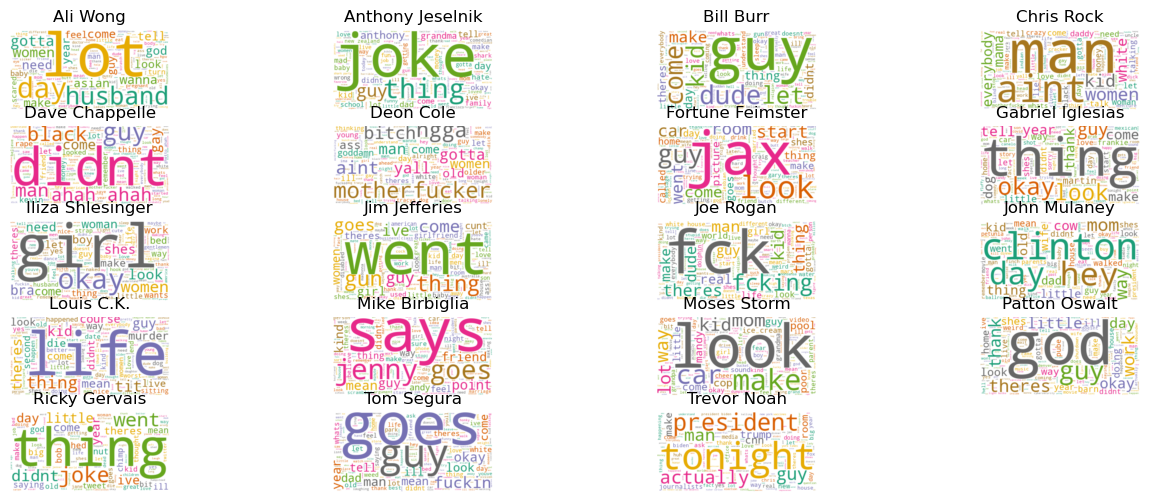

In [10]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names=['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Chris Rock', 'Dave Chappelle', 'Deon Cole', 'Fortune Feimster', 'Gabriel Iglesias', 'Iliza Shlesinger', 'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Moses Storm', 'Patton Oswalt', 'Ricky Gervais', 'Tom Segura', 'Trevor Noah']

# full_names=full_names.sort()
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [11]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
18,Trevor Noah,940
1,Anthony Jeselnik,971
5,Deon Cole,989
3,Chris Rock,1091
12,Louis C.K.,1094
9,Jim Jefferies,1299
6,Fortune Feimster,1321
0,Ali Wong,1333
17,Tom Segura,1336
15,Patton Oswalt,1364


In [12]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79,73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
18,Trevor Noah,940,1984,79,25.113924
6,Fortune Feimster,1321,3310,77,42.987013
5,Deon Cole,989,3218,73,44.082192
12,Louis C.K.,1094,3240,73,44.383562
1,Anthony Jeselnik,971,2824,59,47.864407
11,John Mulaney,1369,3885,79,49.177215
0,Ali Wong,1333,3143,60,52.383333
17,Tom Segura,1336,4150,76,54.605263
15,Patton Oswalt,1364,3386,62,54.612903
14,Moses Storm,1442,3658,63,58.063492


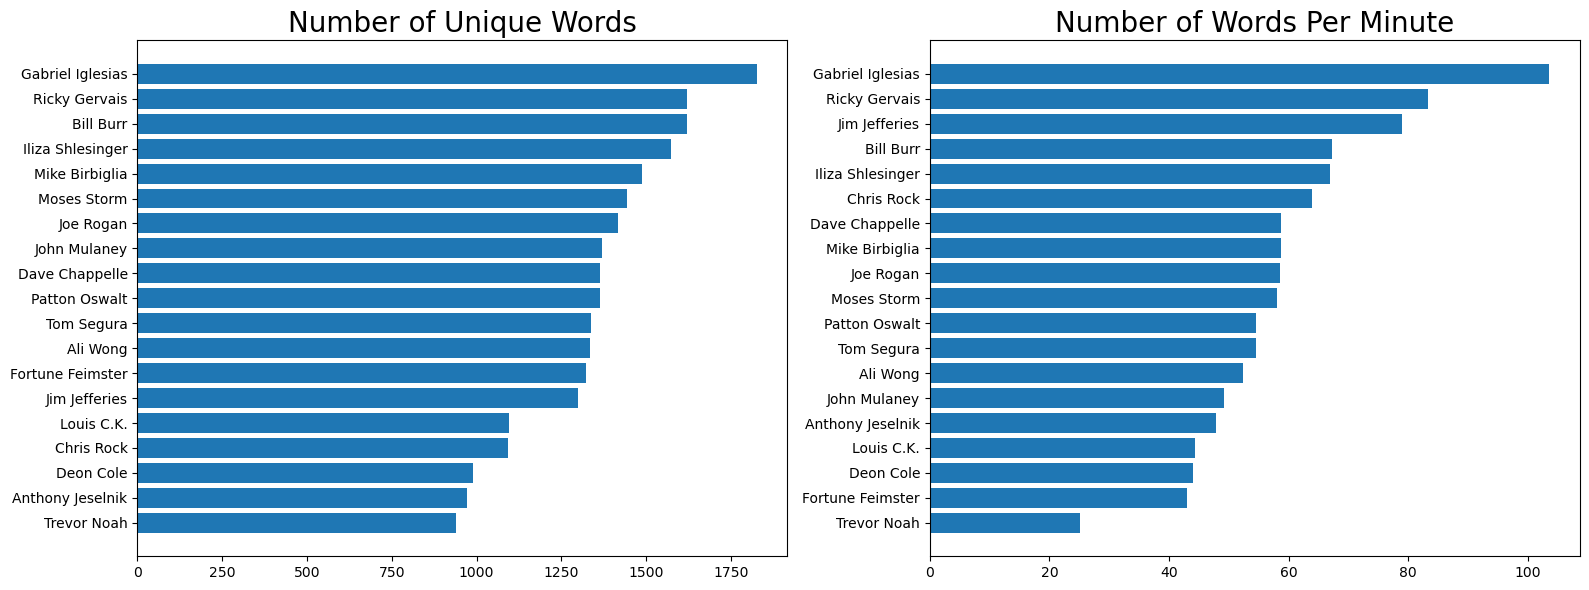

In [13]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [14]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 19),
 ('know', 19),
 ('just', 19),
 ('dont', 19),
 ('thats', 19),
 ('right', 19),
 ('got', 18),
 ('youre', 16),
 ('gonna', 16),
 ('people', 16),
 ('time', 13),
 ('yeah', 13),
 ('think', 13),
 ('hes', 11),
 ('going', 11),
 ('say', 10),
 ('want', 10),
 ('shit', 9),
 ('cause', 9),
 ('said', 9),
 ('good', 9),
 ('theyre', 8),
 ('fuck', 8),
 ('really', 7),
 ('did', 7),
 ('fucking', 7),
 ('day', 6),
 ('tell', 6),
 ('thing', 6),
 ('okay', 6),
 ('guy', 6),
 ('didnt', 6),
 ('theres', 6),
 ('little', 6),
 ('man', 6),
 ('way', 6),
 ('women', 5),
 ('look', 5),
 ('goes', 5),
 ('lot', 4),
 ('guys', 4),
 ('make', 4),
 ('come', 4),
 ('ill', 4),
 ('went', 4),
 ('gotta', 3),
 ('need', 3),
 ('dude', 3),
 ('white', 3),
 ('ive', 3),
 ('doing', 3),
 ('kids', 3),
 ('old', 3),
 ('mean', 3),
 ('god', 2),
 ('work', 2),
 ('joke', 2),
 ('grandma', 2),
 ('let', 2),
 ('aint', 2),
 ('black', 2),
 ('woman', 2),
 ('room', 2),
 ('car', 2),
 ('thank', 2),
 ('shes', 2),
 ('feel', 2),
 ('house', 2),
 ('real', 2),

In [15]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
chris,102,88
dave,65,46
deon,59,129
fortune,0,4
gabriel,6,18
iliza,22,1
jim,115,20


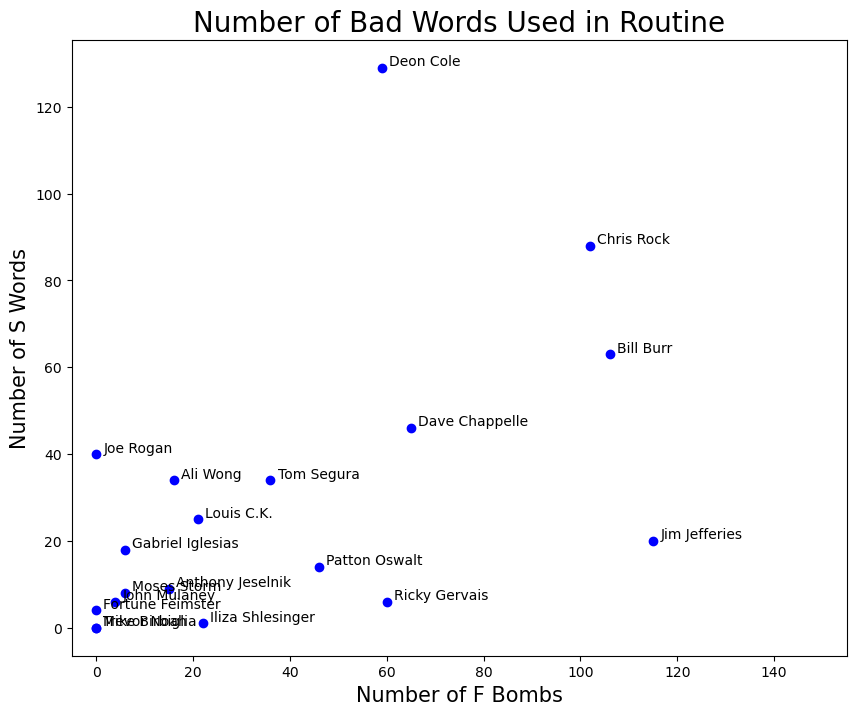

In [16]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [17]:
data_bad_words = data.transpose()[['hello','welcome','hey','thankyou','bye','cheers','thanks','thank','pleasure','appreciate','bitch','cunt','fuck','fucked','fucking','shit','ass','ngga','motherfucker','dick','sex','nude']]
data_profanity = pd.concat([data_bad_words.hello+data_bad_words.welcome+data_bad_words.hey+data_bad_words.thankyou+data_bad_words.bye+data_bad_words.cheers+data_bad_words.thanks+data_bad_words.thank+data_bad_words.pleasure+data_bad_words.appreciate,data_bad_words.bitch+data_bad_words.cunt+data_bad_words.fuck+data_bad_words.fucked+data_bad_words.fucking+data_bad_words.shit+data_bad_words.ass+data_bad_words.ngga+data_bad_words.motherfucker+data_bad_words.dick+data_bad_words.sex+data_bad_words.nude], axis=1)
data_profanity.columns = ['Polite_Words', 'Swearing_Words']
data_profanity

,Polite_Words,Swearing_Words
ali,21,72
anthony,12,30
bill,34,192
chris,18,241
dave,27,137
deon,22,379
fortune,14,7
gabriel,62,38
iliza,17,48
jim,33,186


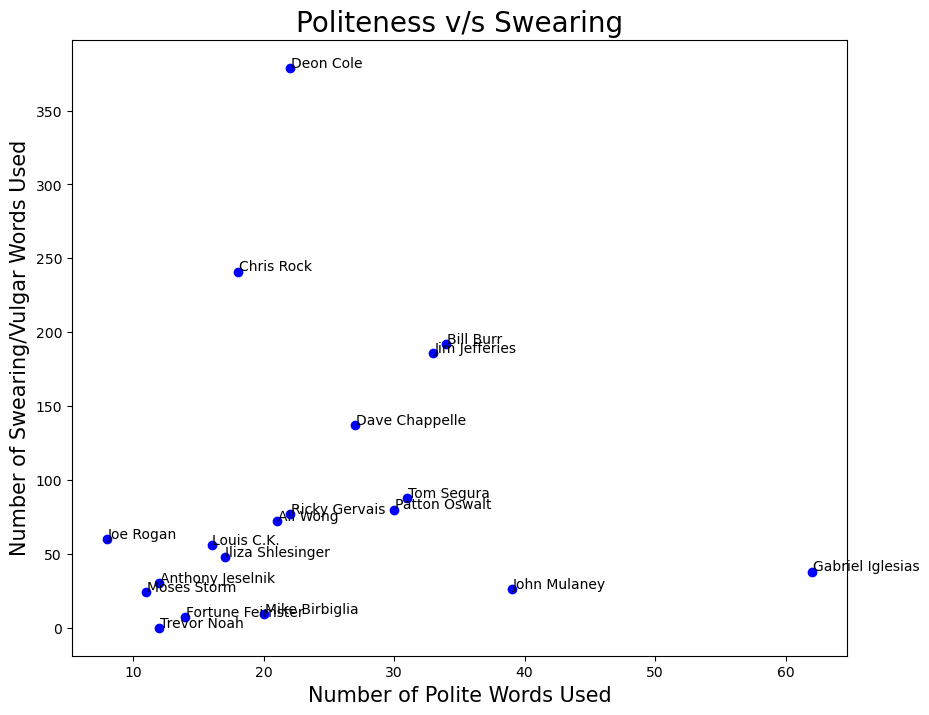

In [18]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.Polite_Words.loc[comedian]
    y = data_profanity.Swearing_Words.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.07, y+0.5, full_names[i], fontsize=10)
#     plt.xlim(-5, 155) 
    
plt.title('Politeness v/s Swearing', fontsize=20)
plt.xlabel('Number of Polite Words Used', fontsize=15)
plt.ylabel('Number of Swearing/Vulgar Words Used', fontsize=15)

plt.show()

### Findings

* It is evident that **Deon Cole** frequently employs a large number of obscene words in his shows indicating a **rough or edgy** comedy style, possibly aimed at a more adult audience.
* **Gabriel Iglesias** is known for using minimal vulgar language indicating a more **light-hearted or clean comedy style**, possibly aimed at a wider audience.

In [19]:
data_bad_words = data.transpose()[['asian','ngga','blacks','whites','black','white','gay','jews', 'god','holy','jesus','sacred','miracle']]
data_profanity = pd.concat([data_bad_words.asian+data_bad_words.ngga+data_bad_words.blacks+data_bad_words.whites+data_bad_words.black+data_bad_words.white+data_bad_words.gay,data_bad_words.god+data_bad_words.holy+data_bad_words.jesus+data_bad_words.sacred+data_bad_words.miracle], axis=1)
data_profanity.columns = ['Racist_Slurs', 'Religious_Slurs']
data_profanity

,Racist_Slurs,Religious_Slurs
ali,27,15
anthony,3,1
bill,14,30
chris,64,8
dave,71,9
deon,79,8
fortune,4,9
gabriel,13,20
iliza,4,8
jim,16,4


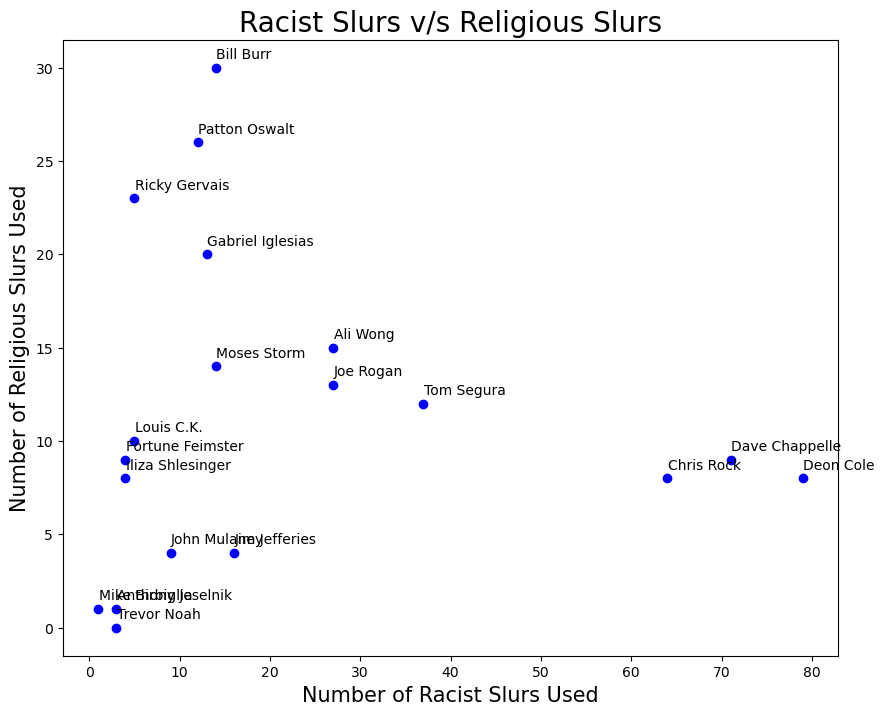

In [20]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.Racist_Slurs.loc[comedian]
    y = data_profanity.Religious_Slurs.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.07, y+0.5, full_names[i], fontsize=10)
#     plt.xlim(-5, 155) 
    
plt.title('Racist Slurs v/s Religious Slurs', fontsize=20)
plt.xlabel('Number of Racist Slurs Used', fontsize=15)
plt.ylabel('Number of Religious Slurs Used', fontsize=15)

plt.show()

### Findings

* It is clear that comedians like **Trevor Noah**, **Anthony Jeselnik**, and **Mike Birbiglia** **steer clear of offensive language** that may offend religious and racial sentiments and avoid controversy.

* It is evident that **Bill Burr** and **Patton Oswalt's** comedy styles include **religious humor**, while **Deon Cole** and **Dave Chappelle's** comedy often centers around **humor related to race**, which may offend some people.

In [22]:
data_bad_words = data.transpose()[['grandma', 'old', 'young', 'kid', 'man', 'men', 'woman', 'women', 'gay','fat', 'guy' , 'dude', 'skinny', 'government', 'politics','justice', 'equality', 'rights', 'freedom', 'corruption', 'politicians', 'cop', 'murder', 'president', 'trump', 'news']]
data_profanity = pd.concat([data_bad_words.grandma+data_bad_words.old+data_bad_words.young+data_bad_words.kid+data_bad_words.man+data_bad_words.men+data_bad_words.woman+data_bad_words.women+data_bad_words.fat+data_bad_words.guy+data_bad_words.dude+data_bad_words.skinny, data_bad_words.government+data_bad_words.politics+data_bad_words.justice+data_bad_words.equality+data_bad_words.rights+data_bad_words.freedom+data_bad_words.corruption+data_bad_words.politicians+data_bad_words.cop+data_bad_words.murder+data_bad_words.president+data_bad_words.trump+data_bad_words.news], axis=1)
data_profanity.columns = ['Personal_Characteristics', 'Societal_Issues']
data_profanity

,Personal_Characteristics,Societal_Issues
ali,72,0
anthony,52,3
bill,155,1
chris,180,6
dave,104,7
deon,122,1
fortune,42,1
gabriel,42,8
iliza,101,4
jim,105,10


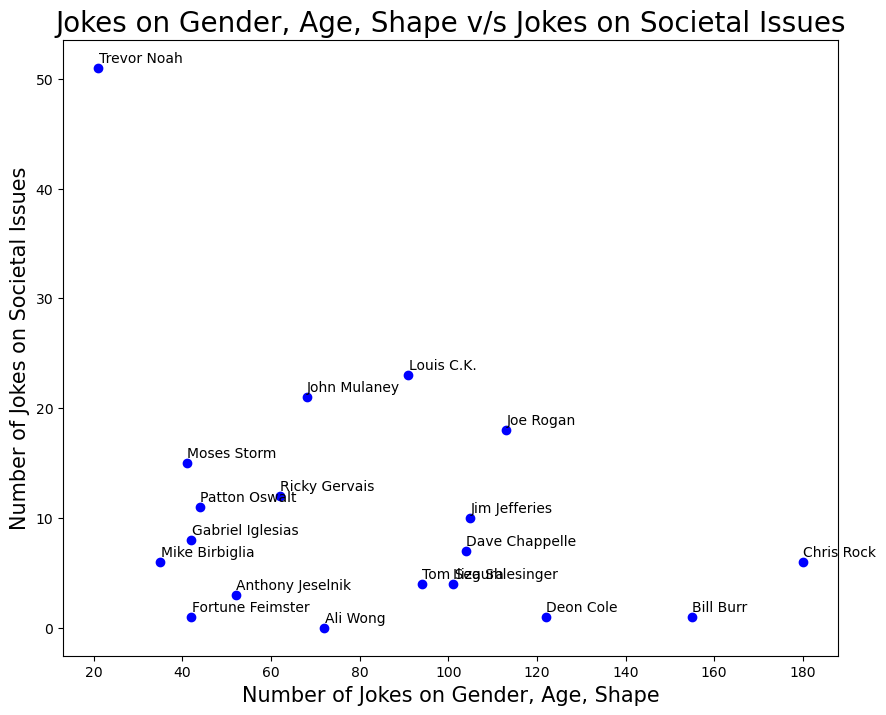

In [23]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.Personal_Characteristics.loc[comedian]
    y = data_profanity.Societal_Issues.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.07, y+0.5, full_names[i], fontsize=10)
#     plt.xlim(-5, 155) 
    
plt.title('Jokes on Gender, Age, Shape v/s Jokes on Societal Issues', fontsize=20)
plt.xlabel('Number of Jokes on Gender, Age, Shape', fontsize=15)
plt.ylabel('Number of Jokes on Societal Issues', fontsize=15)

plt.show()

### Findings

* The scatter plot highlights the distinct comedy styles of **Trevor Noah** and **Chris Rock**. 
* **Noah's** humor focuses on **societal and political issues**, providing thought-provoking commentary that may resonate with a more niche audience. This **type of humor is bold and boundary-pushing**, showcasing societal issues in a daring way. 
* On the other hand, **Chris Rock's** comedy primarily centers around personal characteristics, using humor to **poke fun at everyday life**. This style of **humor is light-hearted and playful**, and has the potential to appeal to a wider range of audiences.